<a href="https://colab.research.google.com/github/abhaymehtre/DA1_cluster-project/blob/main/20173064_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Path of the CSV File
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


path = '/content/earthquake.csv'

#Reading the CSV File

earthquake_df = pd.read_csv(path,engine='python',encoding='iso8859_15')
earthquake_df.head(10)


Sl. No.   YEAR  MONTH   DATE       (UTC) (IST)     Mw       Mw  \
0      NaN     NaN    NaN   NaN         NaN   NaN     NaN     NaN   
1      1.0 -2474.0      0   0.0         NaN   NaN  7.5000     7.5   
2      2.0  -325.0      0   0.0         NaN   NaN  7.5000     7.5   
3      3.0    25.0      0   0.0         NaN   NaN  7.5000     7.5   
4      4.0    26.0      5  10.0  08.19.10.0   NaN  6.1397  6.1397   
5      5.0    26.0      5  10.0  08.19.10.0   NaN  6.1397  6.1397   
6      6.0    50.0      0   0.0         NaN   NaN  7.0000       7   
7      7.0   110.0      0   0.0         NaN   NaN  6.5000     6.5   
8      8.0   250.0      0   0.0         NaN   NaN  8.5000     8.5   
9      9.0   260.0      0   0.0         NaN   NaN  8.0000       8   

            Mb         Mb.1           Ms           ML LAT (N) LONG (E)  \
0          NaN          NaN          NaN          NaN     NaN      NaN   
1          NaN  6.969202899  7.260619977  7.427072403      71       24   
2          NaN  6.969202899  7.260619977  7.427072403      71       24   
3          NaN  6.969202899  7.260619977  7.427072403    72.9    33.72   
4  5.737047101  5.737047101  5.698851894  5.999685205    17.3     80.1   
5  5.737047101  5.737047101  6.075520196  5.999685205      26       97   
6          NaN  6.516304348  6.686567164  6.902413431    69.5     37.1   
7          NaN  6.063405797  6.112514351   6.37775446   76.47     18.1   
8          NaN        7.875  8.408725603  8.476390346    74.5     34.6   
9          NaN  7.422101449   7.83467279  7.951731375    77.2     30.5   

   DEPTH (km) INTENSITY Unnamed: 16 Unnamed: 17 LOCATION REFERENCE  
0         NaN        MM         MMI         MME      NaN       NaN  
1         0.0       NaN         NaN         NaN      NaN   Dr STGR  
2         0.0       NaN         NaN         NaN      NaN   Dr STGR  
3         0.0       NaN         NaN         NaN      NaN   Dr STGR  
4         NaN       NaN         NaN         NaN      NaN      NEIC  
5        80.0       NaN         NaN         NaN  Myanmar       G-R  
6         0.0       NaN         NaN         NaN      NaN   Dr STGR  
7         0.0       NaN         NaN         NaN      NaN   Dr STGR  
8         0.0       NaN         NaN         NaN      NaN   Dr STGR  
9         0.0       NaN         NaN         NaN      NaN   Dr STGR

In [52]:
# Removed the columns which are not relevant for the model training.

df = pd.DataFrame(earthquake_df)



df.drop(['Sl. No.','Mb.1', 'Ms', 'ML', 'Mb','Mw', '(UTC)', '(IST)', 'Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'REFERENCE', 'INTENSITY'], axis=1, inplace = True)

In [53]:
df.isnull().sum()

YEAR              1
MONTH            19
DATE             58
Mw            12055
LAT (N)           1
LONG (E)          1
DEPTH (km)     2179
dtype: int64

In [54]:
df.rename(columns = {'MONTH ':'month'}, inplace = True)
df['month']

0        NaN
1          0
2          0
3          0
4          5
5          5
6          0
7          0
8          0
9          0
10         6
11         0
12         0
13         0
14         0
15         0
16        12
17         0
18         2
19         0
20         0
21         2
22         9
23         0
24         0
25         6
26         7
27         7
28        10
29         1
30         2
31       NaN
32         5
33         5
34         5
35         6
36         6
37       NaN
38         0
39       NaN
40       NaN
41         6
42         2
43       NaN
44         2
45         7
46         7
47         0
48         3
49        10
50        10
51        12
52         1
53         5
54        12
55         1
56         2
57         1
58         2
59        10
60       NaN
61         4
62         7
63         6
64         8
65         6
66         8
67         0
68         1
69         8
70         0
71        11
72         6
73         5
74         5
75        10
76        10

In [55]:
df.fillna(0, inplace=True)

In [56]:
df.head()

YEAR  month  DATE     Mw  LAT (N) LONG (E)  DEPTH (km)
0     0.0     0   0.0  0.0000       0        0         0.0
1 -2474.0     0   0.0  7.5000      71       24         0.0
2  -325.0     0   0.0  7.5000      71       24         0.0
3    25.0     0   0.0  7.5000    72.9    33.72         0.0
4    26.0     5  10.0  6.1397    17.3     80.1         0.0

In [57]:
df=df.drop(labels=[0], axis=0) 

In [58]:
df.head()

YEAR  month  DATE     Mw  LAT (N) LONG (E)  DEPTH (km)
1 -2474.0     0   0.0  7.5000      71       24         0.0
2  -325.0     0   0.0  7.5000      71       24         0.0
3    25.0     0   0.0  7.5000    72.9    33.72         0.0
4    26.0     5  10.0  6.1397    17.3     80.1         0.0
5    26.0     5  10.0  6.1397      26       97        80.0

In [59]:
# To check the values of Latitude and Longitude .
# 
cols_to_check = ['LAT (N)','LONG (E)']

print (df[cols_to_check])

       LAT (N)  LONG (E)
1           71        24
2           71        24
3         72.9     33.72
4         17.3      80.1
5           26        97
6         69.5      37.1
7        76.47      18.1
8         74.5      34.6
9         77.2      30.5
10        65.4      36.4
11        91.8      26.1
12        62.2      34.3
13        67.8      24.8
14        68.9     26.93
15       69.13     32.85
16        19.1      73.2
17          85      27.5
18        62.2      34.4
19        77.2      30.5
20          68      24.1
21        61.7      34.9
22        90.2        30
23        77.2      30.5
24        64.2      35.8
25          69      34.5
26          69        34
27          78      27.2
28        98.5        25
29        71.8      34.8
30        94.9     26.75
31        18.9      72.9
32          25        68
33        19.1      73.2
34        21.2      72.9
35          77        35
36        72.3      33.9
37        19.7      73.1
38        73.2      19.1
39       28.66     77.25


In [60]:
df['LAT (N)'].replace({'°':''}, regex=True, inplace=True)
df['LAT (N)'].replace({' ':''}, regex=True, inplace=True)


In [61]:
df['LAT (N)'].replace({'N':''}, regex=True, inplace=True)



In [62]:
df['LAT (N)'].replace({'S':''}, regex=True, inplace=True)
df['LAT (N)'].replace({',':'.'}, regex=True, inplace=True)
# df['LAT (N)'].replace({'':''}, regex=True, inplace=True)

In [63]:
df['LONG (E)'].replace({'°':''}, regex=True, inplace=True)
df['LONG (E)'].replace({'E':''}, regex=True, inplace=True)
df['LONG (E)'].replace({'W':''}, regex=True, inplace=True)
df['LONG (E)'].replace({',':'.'}, regex=True, inplace=True)
df['LONG (E)'].replace({'S':''}, regex=True, inplace=True)
df['LONG (E)'].replace({' ':''}, regex=True, inplace=True)


In [64]:
# df['month'].replace({' ':''}, regex=True, inplace=True)


df.replace(" ",0, inplace=True)
df.replace('#VALUE!',0,inplace=True)

df.replace('..',0,inplace=True)


In [65]:
# Creating a empty list for Latitude and Longitude values

latitude_list = []

longitude_list = []

# Doing iteration for each Latitude values to remove ? symbol given in the dataset.

for lat in df['LAT (N)'].iteritems():
  initial = lat[1]
  initial1 = initial.replace('?', '')
  latitude_list.append(initial1)

for long in df['LONG (E)'].iteritems():
  long_data = long[1]
  long_data1 = long_data.replace('?', '')
  longitude_list.append(long_data1)  


# Drop the 'LAT (N)', 'LONG (E)' column
df.drop('LAT (N)', axis = 1, inplace = True)

df.drop('LONG (E)', axis = 1, inplace = True)
df.insert(4, "LAT (N)", latitude_list, True)
df.insert(5, "LONG (E)", longitude_list, True)

In [66]:
df.isnull().sum()

YEAR          0
month         0
DATE          0
Mw            0
LAT (N)       0
LONG (E)      0
DEPTH (km)    0
dtype: int64

In [67]:
df.head()

YEAR  month  DATE     Mw  LAT (N) LONG (E)  DEPTH (km)
1 -2474.0     0   0.0  7.5000      71       24         0.0
2  -325.0     0   0.0  7.5000      71       24         0.0
3    25.0     0   0.0  7.5000    72.9    33.72         0.0
4    26.0     5  10.0  6.1397    17.3     80.1         0.0
5    26.0     5  10.0  6.1397      26       97        80.0

In [68]:
df["month"] = df["month"].fillna(0)

In [69]:
# df[] = pd.to_numeric(df["A"], downcast="float")
df["month"] = pd.to_numeric(df["month"])
df["LAT (N)"] = pd.to_numeric(df["LAT (N)"])
df["LONG (E)"] = pd.to_numeric(df["LONG (E)"])


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52989 entries, 1 to 52989
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        52989 non-null  float64
 1   month       52989 non-null  int64  
 2   DATE        52989 non-null  float64
 3   Mw          52989 non-null  float64
 4   LAT (N)     52989 non-null  float64
 5   LONG (E)    52989 non-null  float64
 6   DEPTH (km)  52989 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.2 MB


In [71]:
df.describe()

YEAR          month          DATE           Mw        LAT (N)  \
count  52989.000000  52989.000000  52989.000000  52989.000000  52989.000000   
mean    1991.584669      6.340278     16.376323      3.505354     57.750125   
std       41.964962      3.642311      8.980447      1.980136     31.051927   
min    -2474.000000      0.000000      0.000000      0.000000    -10.900000   
25%     1986.000000      3.000000      9.000000      3.500000     26.770000   
50%     1999.000000      6.000000     16.000000      4.300000     70.390000   
75%     2005.000000     10.000000     25.000000      4.700000     90.790000   
max     2019.000000     12.000000     31.000000      9.100000    100.000000   

           LONG (E)    DEPTH (km)  
count  52989.000000  52989.000000  
mean      52.425021     43.696815  
std       52.111590     55.111697  
min        0.800000      0.000000  
25%       27.500000      3.000000  
50%       37.400000     33.000000  
75%       91.230000     52.000000  
max     9128.200000    831.200000

In [72]:
# Setting the initial threshold to 4.1
initial_threshold = 4.1
Mwlist = []
for mwlist in df['Mw '].iteritems():
 m_list = mwlist[1]
 if m_list < initial_threshold:
  index = 0
  Mwlist.append(index)
 else:
  index = 1
  Mwlist.append(index)
print(Mwlist)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 

In [73]:
# Dropping the Magnitude column
df.drop('Mw ' , axis = 1, inplace = True)
  # Creating the new Magnitude column
df.insert(3, 'Mw', Mwlist, True)
df['Mw'] = pd.to_numeric(df['Mw'])

In [74]:
y=df['Mw'].values
X=df.drop('Mw' , axis = 1).values



In [75]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

-------------------------------------------Data Cleaning Complete-------------------






**Plot ROC for both these classifiers for K as parameter in KNN, pre-
prune depth as a parameter in Decision Tree and number of estimators as parameter in ensemble learning.**

**Hyper Parameters for Decision Trees**

criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
Gini: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
Entropy is a measure of information that indicates the disorder of the features with the target.
splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
min_samples_split: The minimum number of samples required to split an internal node

In [76]:
# Decision Tree Classification before pre-puning
# Declare a Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
import pandas as pd
from sklearn.metrics import classification_report

# predicting 
dt_p=dt_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p))
# printing classification report
print(classification_report(y_test,dt_p))
print(accuracy_score(y_test,dt_p))

[[2581 1143]
 [1116 5758]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      3724
           1       0.83      0.84      0.84      6874

    accuracy                           0.79     10598
   macro avg       0.77      0.77      0.77     10598
weighted avg       0.79      0.79      0.79     10598

0.7868465748254387


In [78]:
# Calculate and draw the ROC Curve for Decision Trees before Pre-pruning
fpr , tpr, thresholds = roc_curve(y_test, dt_p)
tpr

array([0.        , 0.83764911, 1.        ])



ROC Curve for decision tree before calculating Pre-Prune depth.




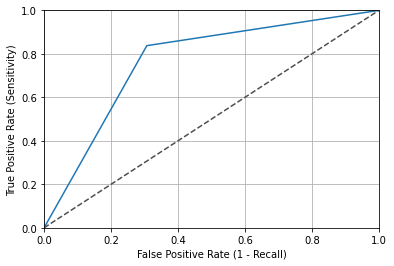



Area Under Curve: 0.77




In [79]:
# Plot a curve for decision tree before pre-prune depth
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree before calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))


print("\n")

In [80]:
# Decision Tree classifier with Pre-Pruning at Max_depth=17
dt_clf1 = DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
dt_clf1.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [81]:
# predicting pre-prune data 
dt_p1=dt_clf1.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p1))
# printing classification report
print(classification_report(y_test,dt_p1))
print(accuracy_score(y_test,dt_p1))

[[2843  881]
 [ 934 5940]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      3724
           1       0.87      0.86      0.87      6874

    accuracy                           0.83     10598
   macro avg       0.81      0.81      0.81     10598
weighted avg       0.83      0.83      0.83     10598

0.8287412719381015


In [82]:
# Calculate and draw the ROC Curve for Decision Trees
fpr , tpr, thresholds = roc_curve(y_test, dt_p1)
tpr

array([0.        , 0.86412569, 1.        ])



ROC Curve for decision tree after calculating Pre-Prune depth.




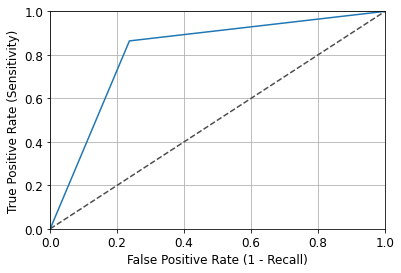



Area Under Curve: 0.81




In [83]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree after calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')


plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))

print("\n")

Pre-Pruning Operation for Decision Tree :



Decision tree for pre-pruned depth




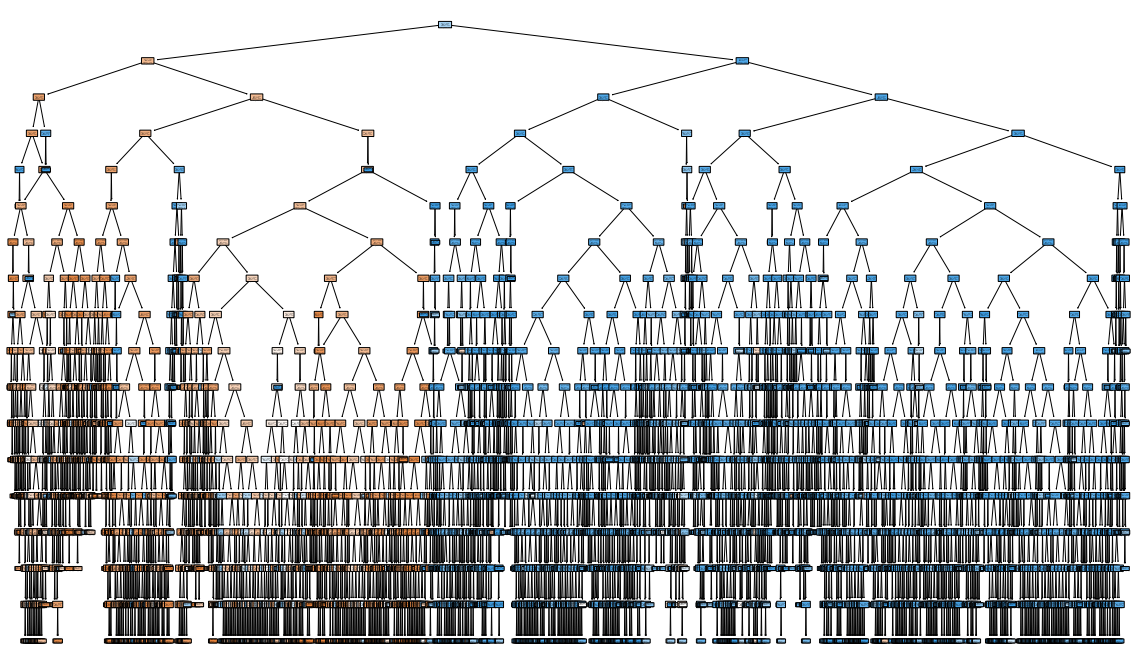

In [84]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt_clf1,rounded=True,filled=True)
print("\n")
print("Decision tree for pre-pruned depth")
print('\n')
plt.show()


In [85]:
# Checking the accuracy score of test dataset after pruning
y_predicted=dt_clf1.predict(X_test)
accuracy_score(y_test,y_predicted)

print("Accuracy Score:", accuracy_score(y_test,y_predicted))

Accuracy Score: 0.8287412719381015


In [86]:
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# We store the classifier in clf variabale and gives the metrics and the best neighbours which fits our models
clf = KNeighborsClassifier(n_neighbors=12, metric="manhattan")
clf.fit(X_train, y_train)
Pred_y = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

print()
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
clf.fit(X_train, y_train)
knn_p = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

#We test the accuracy score
n_neighbors=np.arange(3,12)
optimumk=[]
for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, metric="manhattan")
    knn_clf.fit(X_train, y_train)
    knn_p=knn_clf.predict(X_test)
    acc=accuracy_score(y_test,knn_p)
    optimumk.append(acc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.86
Accuracy of model at k=3 is  0.8423287412719381

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.86
Accuracy of model at k=3 is  0.8423287412719381


Plot for  max accuracy is 0.8427061709756558 when neighbors are 11


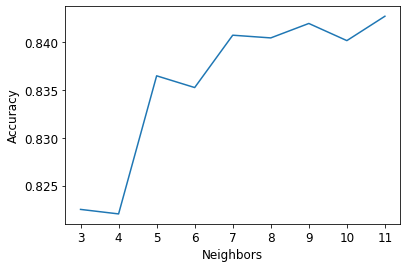

In [87]:
import matplotlib.pyplot as plt
#Plotting Graph
plt.plot(n_neighbors,optimumk)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print(f'Plot for  max accuracy is {max(optimumk)} when neighbors are {n_neighbors[optimumk.index(max(optimumk))]}')

In [88]:
# Calculate and draw the ROC curve for KNN classifier

fpr , tpr, thresholds = roc_curve(y_test, knn_p)
tpr

array([0.        , 0.88114635, 1.        ])



ROC Curve for KNN Classifier




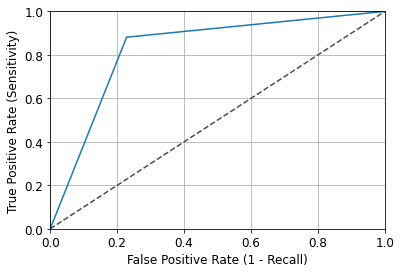



Area Under Curve: 0.83




In [89]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12

print("\n")
print ("ROC Curve for KNN Classifier")
print("\n")

plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Plot the ROC curve by using Ensemble Learning Techniques which include classifiers like Boosting, Bagging and Pasting, Random Forest)**

In [90]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [91]:
# predicting  
ada_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,ada_p))
# printing classification report
print(classification_report(y_test,ada_p))
print(accuracy_score(y_test,ada_p))

[[2868  856]
 [ 824 6050]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3724
           1       0.88      0.88      0.88      6874

    accuracy                           0.84     10598
   macro avg       0.83      0.83      0.83     10598
weighted avg       0.84      0.84      0.84     10598

0.8414795244385733


In [92]:
# Calculation and execution process for the ROC Curve for ADABoosting
fpr , tpr, thresholds = roc_curve(y_test, ada_p)
tpr


array([0.        , 0.88012802, 1.        ])



ROC curve for AdaBoostClassifier




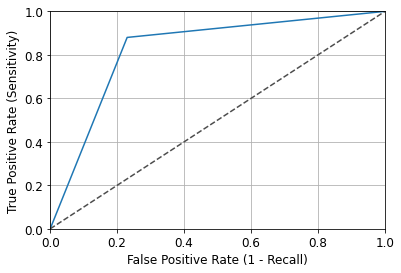



Area Under Curve: 0.83




In [93]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for AdaBoostClassifier")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Bagging and Pasting using Scikit-Learn**

In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False)
bag_clf.fit(X_train, y_train)
bag_p = bag_clf.predict(X_test)

In [95]:
# ROC Curve for Bagging and Pasting
fpr , tpr, thresholds = roc_curve(y_test, bag_p)
tpr


array([0.       , 0.8599069, 1.       ])



ROC curve for Bagging Classifier




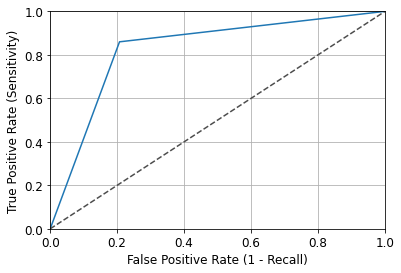



Area Under Curve: 0.83




In [96]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for Bagging Classifier")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [97]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(max_depth=2, random_state=0)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [98]:
# predicting based on random forest classifier
rfc_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,rfc_p))
# printing classification report
print(classification_report(y_test,rfc_p))
print(accuracy_score(y_test,rfc_p))

[[2868  856]
 [ 824 6050]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      3724
           1       0.88      0.88      0.88      6874

    accuracy                           0.84     10598
   macro avg       0.83      0.83      0.83     10598
weighted avg       0.84      0.84      0.84     10598

0.8414795244385733


In [99]:
# ROC CURVE FOR RANDOM FOREST
fpr , tpr, thresholds = roc_curve(y_test, rfc_p)
tpr



array([0.        , 0.88012802, 1.        ])



ROC curve for Random Forest Classifier




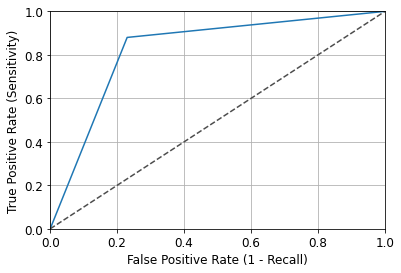



Area Under Curve: 0.83




In [100]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC curve for Random Forest Classifier")
print("\n")

plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

**Final Evaluation of the Model, calculation of various evaluation Metrics**

In [101]:
#Predicting for test data
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [102]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [103]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.8406303076052085
Recall: 0.8406303076052085
Precision: 0.8406303076052085
F1-score: 0.8260425338310169


In [104]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[2920,  804],
       [ 885, 5989]])

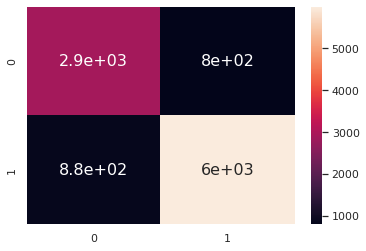

In [105]:
import seaborn as sns

#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()



**K-Fold Validation using Logistic Regression**

In [106]:
# Final model
model=LogisticRegression(solver='liblinear',class_weight= None,multi_class= 'ovr', 
                  dual=False, penalty= 'l2',C=0.3,max_iter=300000)
# train the model
model.fit(X_train,y_train)

# predicting activity labels
pred_y=model.predict(X_test)

In [107]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import metrics
# from sklearn.model_selection import cross_val_score
acc=[]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    trainx,trainy=X[train_index],y[train_index]
    testx,testy=X[test_index],y[test_index]
    model.fit(trainx,trainy)
    pred=model.predict(testx)
    acc.append(accuracy_score(testy,pred))
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
# # report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(acc)
print(np.mean(acc))


[0.7830722777882619, 0.801943762974146, 0.8333647858086431, 0.898377052274014, 0.7428517504954232]
0.8119219258680976


In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [109]:
# Predicting 
y_pred = clf.predict(X_test)
results = confusion_matrix(y_test, y_pred)
#print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test, y_pred))
print ('Classification Report : ')
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))

[[2920  804]
 [ 885 5989]]
Accuracy Score is 0.8406303076052085
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3724
           1       0.88      0.87      0.88      6874

    accuracy                           0.84     10598
   macro avg       0.82      0.83      0.83     10598
weighted avg       0.84      0.84      0.84     10598

AUC-ROC: 0.8276785577560427
LOGLOSS Value is 5.504494829905457


**Selecting the best algorithm from all the above classifier algorithm used based on accuracy**

In [110]:
#selecting the best algorithm from all the algorithms based on accuracy
classifier=[dt_clf,dt_clf1,knn_clf,ada_clf,rfc_clf,bag_clf]
predictions=[dt_p,y_predicted,knn_p,ada_p,rfc_p,bag_p]


for clf,pred in zip(classifier,predictions):
    print(f'accuracy with {clf.__class__.__name__} : {accuracy_score(y_test,pred)}')

accuracy with DecisionTreeClassifier : 0.7868465748254387
accuracy with DecisionTreeClassifier : 0.8287412719381015
accuracy with KNeighborsClassifier : 0.8427061709756558
accuracy with AdaBoostClassifier : 0.8414795244385733
accuracy with RandomForestClassifier : 0.8414795244385733
accuracy with BaggingClassifier : 0.8363842234383846


**Score Comparison for Bagging Classifier and Random Forest Classifier**

In [111]:
# Score Comparison for Bagging Classifier and Random Forest Classifier

np.sum(bag_p == rfc_p) / len(bag_p)

print("Prediction score for Bagging Classifier and Random Forest Classifier : ", np.sum(bag_p == rfc_p) / len(bag_p))

Prediction score for Bagging Classifier and Random Forest Classifier :  0.9613134553689375


**Report for the classification Assignment**

1. Which is the better classifier for this data amongst the three? Give Reasoning.

Ans: 
Based on the classification techniques used on the dataset, I consider the bagging classifier along with the random forest classifier is better amongst the other classifiers. We could also consider the KNN classifier but only after using the pre-prune depth technique the accuracy score is increased.

2. What could be the best possible values of the parameters for respective
classifier based on the ROC curves? Give Reasoning.

Ans:
The best possible values of the parameters 

3. If you have to choose only a subset of two features to predict earthquake,
which ones would it be? Give Reasoning. [Hint: You may use nodes of
estimated Decision Tree or other techniques]

Ans:

4. Consider test results of the best model from above analysis. Report the in-
put features that was used to achieve this. Try to improvise the test results
by applying feature processing(You may come up with additional features
by processing original ones). Report the new set of features that was used
and also report the improvements in test results that was achieved. Please
use appropriate metrics to report the results.

Ans: